In [ ]:
import js

# Access the navigator object to get browser information
user_agent = js.navigator.userAgent
platform = js.navigator.platform
language = js.navigator.language

# Print browser information
print("User Agent:", user_agent)
print()
print("Platform:", platform)
print()
print("Language:", language)
print()




In [21]:
import piplite
await piplite.install("scikit-fem")
await piplite.install("meshio")

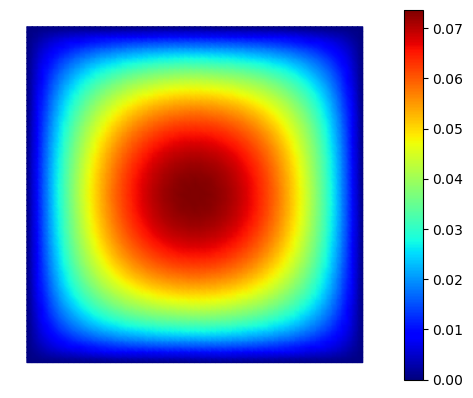

In [28]:
# https://github.com/kinnala/scikit-fem-notebooks/blob/main/ex01.ipynb
# This example solves the Poisson problem 
#  with the Dirichlet boundary condition 
#  in the unit square using piecewise-linear triangular elements.
from skfem import *
from skfem.helpers import dot, grad
%matplotlib inline
# # enable additional mesh validity checks, sacrificing performance
# import logging
# logging.basicConfig(format='%(levelname)s %(asctime)s %(name)s %(message)s')
# logging.getLogger('skfem').setLevel(logging.DEBUG)

# create the mesh
m = MeshTri().refined(6)
# or, with your own points and cells:
# m = MeshTri(points, cells)

e = ElementTriP1()
basis = Basis(m, e)

# this method could also be imported from skfem.models.laplace
@BilinearForm
def laplace(u, v, _):
    return dot(grad(u), grad(v))


# this method could also be imported from skfem.models.unit_load
@LinearForm
def rhs(v, _):
    return 1.0 * v

A = asm(laplace, basis)
b = asm(rhs, basis)
# or:
# A = laplace.assemble(basis)
# b = rhs.assemble(basis)

# enforce Dirichlet boundary conditions
A, b = enforce(A, b, D=m.boundary_nodes())

# solve -- can be anything that takes a sparse matrix and a right-hand side
x = solve(A, b)

def visualize():
    from skfem.visuals.matplotlib import plot
    return plot(m, x, shading='gouraud', colorbar=True)

if __name__ == "__main__":
    visualize().show()
